In [1]:
%matplotlib inline
import sys
sys.path.append('../')
import numpy
import keras
from keras import backend as K

import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from wlc.WLweakener import computeM, generateWeak, weak_to_index, binarizeWeakLabels
from experiments.visualizations import plot_history
from experiments.visualizations import plot_multilabel_scatter

cmap = plt.cm.get_cmap('Accent')

Using TensorFlow backend.


# Create a dataset with true labels

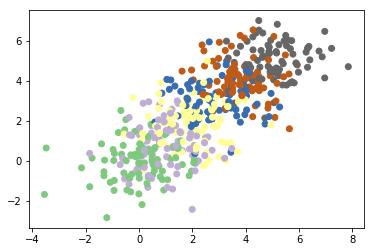

In [2]:
n_samples = 10000
n_classes = 6
X = numpy.random.randn(n_samples, 2)
y = numpy.random.randint(0, n_classes, n_samples)
X += y.reshape(-1,1)
Y = label_binarize(y, range(n_classes))
plt.scatter(X[:500,0], X[:500,1], c=y[:500], cmap=cmap)

# Generate weak labels and virtual labels

[[0.    0.    0.    0.    0.    0.   ]
 [0.023 0.023 0.023 0.023 0.023 0.124]
 [0.023 0.023 0.023 0.023 0.124 0.023]
 [0.01  0.01  0.01  0.01  0.053 0.053]
 [0.023 0.023 0.023 0.124 0.023 0.023]
 [0.01  0.01  0.01  0.053 0.01  0.053]
 [0.01  0.01  0.01  0.053 0.053 0.01 ]
 [0.004 0.004 0.004 0.023 0.023 0.023]
 [0.023 0.023 0.124 0.023 0.023 0.023]
 [0.01  0.01  0.053 0.01  0.01  0.053]
 [0.01  0.01  0.053 0.01  0.053 0.01 ]
 [0.004 0.004 0.023 0.004 0.023 0.023]
 [0.01  0.01  0.053 0.053 0.01  0.01 ]
 [0.004 0.004 0.023 0.023 0.004 0.023]
 [0.004 0.004 0.023 0.023 0.023 0.004]
 [0.002 0.002 0.01  0.01  0.01  0.01 ]
 [0.023 0.124 0.023 0.023 0.023 0.023]
 [0.01  0.053 0.01  0.01  0.01  0.053]
 [0.01  0.053 0.01  0.01  0.053 0.01 ]
 [0.004 0.023 0.004 0.004 0.023 0.023]
 [0.01  0.053 0.01  0.053 0.01  0.01 ]
 [0.004 0.023 0.004 0.023 0.004 0.023]
 [0.004 0.023 0.004 0.023 0.023 0.004]
 [0.002 0.01  0.002 0.01  0.01  0.01 ]
 [0.01  0.053 0.053 0.01  0.01  0.01 ]
 [0.004 0.023 0.023 0.004

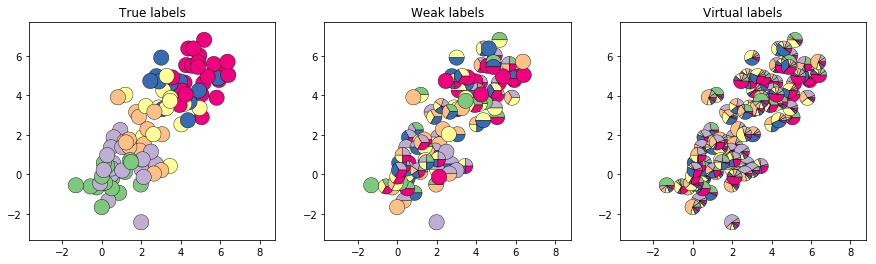

In [17]:
M_method = 'IPL'
M = computeM(n_classes, alpha=0.7, beta=0.3, method=M_method, seed=0)
if M.shape[0] == 2**M.shape[1]:
    M[0,:] = 0
    M /= M.sum(axis=0)
print(numpy.round(M, decimals=3))
z = generateWeak(y, M, seed=0)
Z = binarizeWeakLabels(z, c=n_classes)

M_indices = weak_to_index(Z, method=M_method)
V = M[M_indices]

fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 3, 1)
_ = plot_multilabel_scatter(X[:100], Y[:100], fig=fig,
                            ax=ax, title='True labels', cmap=cmap)
ax = fig.add_subplot(1, 3, 2)
_ = plot_multilabel_scatter(X[:100], Z[:100], fig=fig,
                            ax=ax, title='Weak labels', cmap=cmap)
ax = fig.add_subplot(1, 3, 3)
_ = plot_multilabel_scatter(X[:100], V[:100], fig=fig,
                            ax=ax, title='Virtual labels', cmap=cmap)

# Divide into training, validation and test

In [4]:
X_train, X_val, X_test = numpy.array_split(X, 3)
Y_train, Y_val, Y_test = numpy.array_split(Y, 3)
Z_train, Z_val, Z_test = numpy.array_split(Z, 3)
V_train, V_val, V_test = numpy.array_split(V, 3)
y_train, y_val, y_test = numpy.array_split(y, 3)

final_models = {}

# Fully supervised (upperbound)

Train with all true labels

Train on 3334 samples, validate on 3333 samples
Epoch 1/1000
3334/3334 [==============================] - 0s 97us/step - loss: 2.4750 - acc: 0.1788 - val_loss: 2.1945 - val_acc: 0.1902
Epoch 2/1000
3334/3334 [==============================] - 0s 44us/step - loss: 2.0465 - acc: 0.1779 - val_loss: 1.8884 - val_acc: 0.1758
Epoch 3/1000
3334/3334 [==============================] - 0s 43us/step - loss: 1.8152 - acc: 0.1761 - val_loss: 1.7301 - val_acc: 0.1920
Epoch 4/1000
3334/3334 [==============================] - 0s 44us/step - loss: 1.6836 - acc: 0.2142 - val_loss: 1.6307 - val_acc: 0.2502
Epoch 5/1000
3334/3334 [==============================] - 0s 43us/step - loss: 1.6055 - acc: 0.2567 - val_loss: 1.5740 - val_acc: 0.2724
Epoch 6/1000
3334/3334 [==============================] - 0s 43us/step - loss: 1.5578 - acc: 0.2792 - val_loss: 1.5366 - val_acc: 0.2862
Epoch 7/1000
3334/3334 [==============================] - 0s 43us/step - loss: 1.5236 - acc: 0.3059 - val_loss: 1.5061 - val_acc: 

3334/3334 [==============================] - 0s 48us/step - loss: 1.0753 - acc: 0.5588 - val_loss: 1.0737 - val_acc: 0.5575
Epoch 61/1000
3334/3334 [==============================] - 0s 45us/step - loss: 1.0731 - acc: 0.5675 - val_loss: 1.0714 - val_acc: 0.5563
Epoch 62/1000
3334/3334 [==============================] - 0s 56us/step - loss: 1.0705 - acc: 0.5594 - val_loss: 1.0688 - val_acc: 0.5620
Epoch 63/1000
3334/3334 [==============================] - 0s 67us/step - loss: 1.0682 - acc: 0.5714 - val_loss: 1.0668 - val_acc: 0.5581
Epoch 64/1000
3334/3334 [==============================] - 0s 77us/step - loss: 1.0659 - acc: 0.5708 - val_loss: 1.0646 - val_acc: 0.5566
Epoch 65/1000
3334/3334 [==============================] - 0s 50us/step - loss: 1.0635 - acc: 0.5699 - val_loss: 1.0626 - val_acc: 0.5470
Epoch 66/1000
3334/3334 [==============================] - 0s 44us/step - loss: 1.0617 - acc: 0.5618 - val_loss: 1.0601 - val_acc: 0.5596
Epoch 67/1000
3334/3334 [=======================

3334/3334 [==============================] - 0s 54us/step - loss: 0.9886 - acc: 0.5843 - val_loss: 0.9888 - val_acc: 0.5782
Epoch 120/1000
3334/3334 [==============================] - 0s 42us/step - loss: 0.9877 - acc: 0.5885 - val_loss: 0.9884 - val_acc: 0.5782
Epoch 121/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.9869 - acc: 0.5870 - val_loss: 0.9870 - val_acc: 0.5827
Epoch 122/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.9859 - acc: 0.5879 - val_loss: 0.9865 - val_acc: 0.5791
Epoch 123/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.9851 - acc: 0.5885 - val_loss: 0.9853 - val_acc: 0.5824
Epoch 124/1000
3334/3334 [==============================] - 0s 39us/step - loss: 0.9842 - acc: 0.5885 - val_loss: 0.9844 - val_acc: 0.5812
Epoch 125/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.9837 - acc: 0.5900 - val_loss: 0.9835 - val_acc: 0.5851
Epoch 126/1000
3334/3334 [================

3334/3334 [==============================] - 0s 47us/step - loss: 0.9523 - acc: 0.5942 - val_loss: 0.9532 - val_acc: 0.5857
Epoch 179/1000
3334/3334 [==============================] - 0s 43us/step - loss: 0.9518 - acc: 0.5915 - val_loss: 0.9533 - val_acc: 0.5872
Epoch 180/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.9514 - acc: 0.5915 - val_loss: 0.9525 - val_acc: 0.5878
Epoch 181/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.9510 - acc: 0.5945 - val_loss: 0.9523 - val_acc: 0.5857
Epoch 182/1000
3334/3334 [==============================] - 0s 43us/step - loss: 0.9508 - acc: 0.5900 - val_loss: 0.9515 - val_acc: 0.5851
Epoch 183/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.9501 - acc: 0.5948 - val_loss: 0.9519 - val_acc: 0.5836
Epoch 184/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.9497 - acc: 0.5948 - val_loss: 0.9518 - val_acc: 0.5827
Epoch 185/1000
3334/3334 [================

3334/3334 [==============================] - 0s 48us/step - loss: 0.9322 - acc: 0.5972 - val_loss: 0.9341 - val_acc: 0.5869
Epoch 238/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.9318 - acc: 0.5942 - val_loss: 0.9338 - val_acc: 0.5875
Epoch 239/1000
3334/3334 [==============================] - 0s 43us/step - loss: 0.9316 - acc: 0.5957 - val_loss: 0.9336 - val_acc: 0.5884
Epoch 240/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.9311 - acc: 0.5966 - val_loss: 0.9330 - val_acc: 0.5887
Epoch 241/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.9312 - acc: 0.5987 - val_loss: 0.9327 - val_acc: 0.5860
Epoch 242/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.9308 - acc: 0.5933 - val_loss: 0.9331 - val_acc: 0.5878
Epoch 243/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.9305 - acc: 0.5969 - val_loss: 0.9322 - val_acc: 0.5863
Epoch 244/1000
3334/3334 [================

3334/3334 [==============================] - 0s 52us/step - loss: 0.9197 - acc: 0.5975 - val_loss: 0.9219 - val_acc: 0.5899
Epoch 297/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.9192 - acc: 0.5966 - val_loss: 0.9221 - val_acc: 0.5884
Epoch 298/1000
3334/3334 [==============================] - 0s 43us/step - loss: 0.9191 - acc: 0.5933 - val_loss: 0.9215 - val_acc: 0.5857
Epoch 299/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.9192 - acc: 0.5939 - val_loss: 0.9218 - val_acc: 0.5881
Epoch 300/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.9190 - acc: 0.5984 - val_loss: 0.9216 - val_acc: 0.5878
Epoch 301/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.9191 - acc: 0.5960 - val_loss: 0.9214 - val_acc: 0.5890
Epoch 302/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.9187 - acc: 0.5951 - val_loss: 0.9212 - val_acc: 0.5890
Epoch 303/1000
3334/3334 [================

3334/3334 [==============================] - 0s 64us/step - loss: 0.9114 - acc: 0.5978 - val_loss: 0.9141 - val_acc: 0.5893
Epoch 356/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.9112 - acc: 0.5966 - val_loss: 0.9139 - val_acc: 0.5887
Epoch 357/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.9110 - acc: 0.5963 - val_loss: 0.9137 - val_acc: 0.5914
Epoch 358/1000
3334/3334 [==============================] - 0s 43us/step - loss: 0.9109 - acc: 0.5963 - val_loss: 0.9140 - val_acc: 0.5890
Epoch 359/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.9108 - acc: 0.5975 - val_loss: 0.9136 - val_acc: 0.5905
Epoch 360/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.9110 - acc: 0.5924 - val_loss: 0.9136 - val_acc: 0.5887
Epoch 361/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.9108 - acc: 0.5942 - val_loss: 0.9136 - val_acc: 0.5890
Epoch 362/1000
3334/3334 [================

3334/3334 [==============================] - 0s 49us/step - loss: 0.9053 - acc: 0.5963 - val_loss: 0.9085 - val_acc: 0.5887
Epoch 415/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.9053 - acc: 0.5981 - val_loss: 0.9077 - val_acc: 0.5926
Epoch 416/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.9052 - acc: 0.5963 - val_loss: 0.9080 - val_acc: 0.5893
Epoch 417/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.9051 - acc: 0.5963 - val_loss: 0.9081 - val_acc: 0.5917
Epoch 418/1000
3334/3334 [==============================] - 0s 43us/step - loss: 0.9052 - acc: 0.5990 - val_loss: 0.9084 - val_acc: 0.5863
Epoch 419/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.9050 - acc: 0.5960 - val_loss: 0.9075 - val_acc: 0.5920
Epoch 420/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.9050 - acc: 0.5969 - val_loss: 0.9075 - val_acc: 0.5923
Epoch 421/1000
3334/3334 [================

3334/3334 [==============================] - 0s 51us/step - loss: 0.9015 - acc: 0.5942 - val_loss: 0.9045 - val_acc: 0.5926
Epoch 474/1000
3334/3334 [==============================] - 0s 43us/step - loss: 0.9009 - acc: 0.5954 - val_loss: 0.9039 - val_acc: 0.5905
Epoch 475/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.9010 - acc: 0.5972 - val_loss: 0.9040 - val_acc: 0.5920
Epoch 476/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.9009 - acc: 0.6005 - val_loss: 0.9043 - val_acc: 0.5932
Epoch 477/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.9007 - acc: 0.5954 - val_loss: 0.9037 - val_acc: 0.5920
Epoch 478/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.9006 - acc: 0.5999 - val_loss: 0.9037 - val_acc: 0.5929
Epoch 479/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.9005 - acc: 0.5984 - val_loss: 0.9036 - val_acc: 0.5923
Epoch 480/1000
3334/3334 [================

3334/3334 [==============================] - 0s 49us/step - loss: 0.8977 - acc: 0.5969 - val_loss: 0.9008 - val_acc: 0.5920
Epoch 533/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.8977 - acc: 0.5987 - val_loss: 0.9014 - val_acc: 0.5917
Epoch 534/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.8977 - acc: 0.5975 - val_loss: 0.9007 - val_acc: 0.5923
Epoch 535/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.8980 - acc: 0.5972 - val_loss: 0.9014 - val_acc: 0.5923
Epoch 536/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.8975 - acc: 0.5990 - val_loss: 0.9006 - val_acc: 0.5932
Epoch 537/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.8975 - acc: 0.5987 - val_loss: 0.9006 - val_acc: 0.5929
Epoch 538/1000
3334/3334 [==============================] - 0s 43us/step - loss: 0.8977 - acc: 0.5966 - val_loss: 0.9012 - val_acc: 0.5917
Epoch 539/1000
3334/3334 [================

3334/3334 [==============================] - 0s 48us/step - loss: 0.8952 - acc: 0.5990 - val_loss: 0.8990 - val_acc: 0.5944
Epoch 592/1000
3334/3334 [==============================] - 0s 43us/step - loss: 0.8954 - acc: 0.5972 - val_loss: 0.8990 - val_acc: 0.5932
Epoch 593/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.8952 - acc: 0.5990 - val_loss: 0.8987 - val_acc: 0.5929
Epoch 594/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.8953 - acc: 0.5981 - val_loss: 0.8985 - val_acc: 0.5929
Epoch 595/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.8951 - acc: 0.5966 - val_loss: 0.8988 - val_acc: 0.5920
Epoch 596/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.8949 - acc: 0.5960 - val_loss: 0.8983 - val_acc: 0.5923
Epoch 597/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.8951 - acc: 0.5948 - val_loss: 0.8984 - val_acc: 0.5911
Epoch 598/1000
3334/3334 [================

3334/3334 [==============================] - 0s 49us/step - loss: 0.8934 - acc: 0.5984 - val_loss: 0.8973 - val_acc: 0.5938
Epoch 651/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.8935 - acc: 0.5969 - val_loss: 0.8975 - val_acc: 0.5908
Epoch 652/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.8934 - acc: 0.5975 - val_loss: 0.8969 - val_acc: 0.5926
Epoch 653/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.8932 - acc: 0.5984 - val_loss: 0.8974 - val_acc: 0.5914
Epoch 654/1000
3334/3334 [==============================] - 0s 43us/step - loss: 0.8933 - acc: 0.5996 - val_loss: 0.8973 - val_acc: 0.5917
Epoch 655/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.8935 - acc: 0.5966 - val_loss: 0.8973 - val_acc: 0.5941
Epoch 656/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.8931 - acc: 0.5978 - val_loss: 0.8971 - val_acc: 0.5935
Epoch 657/1000
3334/3334 [================

3334/3334 [==============================] - 0s 50us/step - loss: 0.8919 - acc: 0.5999 - val_loss: 0.8952 - val_acc: 0.5935
Epoch 710/1000
3334/3334 [==============================] - 0s 43us/step - loss: 0.8917 - acc: 0.6005 - val_loss: 0.8951 - val_acc: 0.5932
Epoch 711/1000
3334/3334 [==============================] - 0s 58us/step - loss: 0.8921 - acc: 0.5963 - val_loss: 0.8952 - val_acc: 0.5923
Epoch 712/1000
3334/3334 [==============================] - 0s 66us/step - loss: 0.8918 - acc: 0.5975 - val_loss: 0.8952 - val_acc: 0.5923
Epoch 713/1000
3334/3334 [==============================] - 0s 50us/step - loss: 0.8918 - acc: 0.5981 - val_loss: 0.8958 - val_acc: 0.5938
Epoch 714/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.8917 - acc: 0.5984 - val_loss: 0.8957 - val_acc: 0.5938
Epoch 715/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.8917 - acc: 0.5951 - val_loss: 0.8953 - val_acc: 0.5914
Epoch 716/1000
3334/3334 [================

3334/3334 [==============================] - 0s 51us/step - loss: 0.8905 - acc: 0.5984 - val_loss: 0.8948 - val_acc: 0.5926
Epoch 769/1000
3334/3334 [==============================] - 0s 43us/step - loss: 0.8904 - acc: 0.5981 - val_loss: 0.8943 - val_acc: 0.5911
Epoch 770/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.8906 - acc: 0.5990 - val_loss: 0.8945 - val_acc: 0.5950
Epoch 771/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.8909 - acc: 0.5978 - val_loss: 0.8941 - val_acc: 0.5938
Epoch 772/1000
3334/3334 [==============================] - 0s 42us/step - loss: 0.8907 - acc: 0.5972 - val_loss: 0.8941 - val_acc: 0.5923
Epoch 773/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.8905 - acc: 0.5984 - val_loss: 0.8954 - val_acc: 0.5908
Epoch 774/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.8905 - acc: 0.5951 - val_loss: 0.8945 - val_acc: 0.5938
Epoch 775/1000
3334/3334 [================

3334/3334 [==============================] - 0s 43us/step - loss: 0.8897 - acc: 0.5987 - val_loss: 0.8937 - val_acc: 0.5938
Epoch 828/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.8895 - acc: 0.5948 - val_loss: 0.8942 - val_acc: 0.5932
Epoch 829/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.8896 - acc: 0.5957 - val_loss: 0.8940 - val_acc: 0.5944
Epoch 830/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.8895 - acc: 0.5981 - val_loss: 0.8936 - val_acc: 0.5911
Epoch 831/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.8895 - acc: 0.5954 - val_loss: 0.8936 - val_acc: 0.5932
Epoch 832/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.8895 - acc: 0.5942 - val_loss: 0.8937 - val_acc: 0.5929
Epoch 833/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.8894 - acc: 0.5990 - val_loss: 0.8933 - val_acc: 0.5929
Epoch 834/1000
3334/3334 [================

3334/3334 [==============================] - 0s 50us/step - loss: 0.8886 - acc: 0.5966 - val_loss: 0.8932 - val_acc: 0.5932
Epoch 887/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.8886 - acc: 0.5957 - val_loss: 0.8927 - val_acc: 0.5923
Epoch 888/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.8890 - acc: 0.5957 - val_loss: 0.8927 - val_acc: 0.5932
Epoch 889/1000
3334/3334 [==============================] - 0s 43us/step - loss: 0.8887 - acc: 0.5972 - val_loss: 0.8928 - val_acc: 0.5944
Epoch 890/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.8887 - acc: 0.5981 - val_loss: 0.8929 - val_acc: 0.5920
Epoch 891/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.8888 - acc: 0.5963 - val_loss: 0.8928 - val_acc: 0.5926
Epoch 892/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.8887 - acc: 0.5978 - val_loss: 0.8931 - val_acc: 0.5929
Epoch 893/1000
3334/3334 [================

3334/3334 [==============================] - 0s 45us/step - loss: 0.8879 - acc: 0.5996 - val_loss: 0.8923 - val_acc: 0.5941
Epoch 946/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.8880 - acc: 0.5960 - val_loss: 0.8925 - val_acc: 0.5938
Epoch 947/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.8881 - acc: 0.5975 - val_loss: 0.8922 - val_acc: 0.5935
Epoch 948/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.8879 - acc: 0.5978 - val_loss: 0.8922 - val_acc: 0.5929
Epoch 949/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.8882 - acc: 0.5981 - val_loss: 0.8924 - val_acc: 0.5941
Epoch 950/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.8879 - acc: 0.6011 - val_loss: 0.8926 - val_acc: 0.5932
Epoch 951/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.8881 - acc: 0.5960 - val_loss: 0.8921 - val_acc: 0.5923
Epoch 952/1000
3334/3334 [================

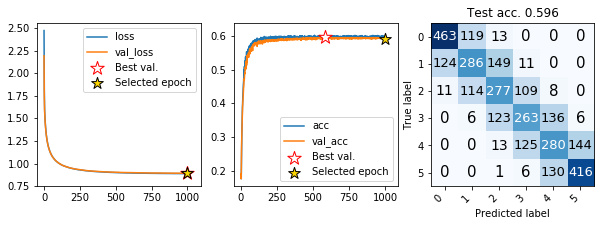

<Figure size 360x288 with 0 Axes>

In [5]:
from keras.callbacks import EarlyStopping

max_epochs = 1000
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=int(max_epochs/20), 
                               verbose=2, mode='auto', baseline=None,
                               restore_best_weights=True)

numpy.random.seed(0)
model = keras.models.Sequential() 
model.add(keras.layers.Dense(Y.shape[1], input_dim=X.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, Y_train, 
                    validation_data=(X_val, Y_val),
                    epochs=max_epochs, verbose=1, callbacks=[early_stopping],
                    shuffle=True)
    
plot_history(history, model, X_test, y_test)

final_models['Fully supervised'] = model

# Our method with EM and original M

Train EM with all weak labels

Train on 3334 samples, validate on 3333 samples
Epoch 1/1000
3334/3334 [==============================] - 0s 82us/step - loss: 0.2372 - acc: 0.2133 - val_loss: 0.4137 - val_acc: 0.1989
Epoch 2/1000
3334/3334 [==============================] - 0s 43us/step - loss: 0.2555 - acc: 0.2145 - val_loss: 0.3726 - val_acc: 0.2091
Epoch 3/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.2679 - acc: 0.1941 - val_loss: 0.3428 - val_acc: 0.2007
Epoch 4/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.2666 - acc: 0.1818 - val_loss: 0.3249 - val_acc: 0.2121
Epoch 5/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2658 - acc: 0.1725 - val_loss: 0.3102 - val_acc: 0.2322
Epoch 6/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.2671 - acc: 0.1746 - val_loss: 0.2929 - val_acc: 0.2601
Epoch 7/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2711 - acc: 0.1758 - val_loss: 0.2767 - val_acc: 

3334/3334 [==============================] - 0s 44us/step - loss: 0.2350 - acc: 0.1701 - val_loss: 0.2066 - val_acc: 0.4617
Epoch 61/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2342 - acc: 0.1650 - val_loss: 0.2062 - val_acc: 0.4596
Epoch 62/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2342 - acc: 0.1671 - val_loss: 0.2056 - val_acc: 0.4575
Epoch 63/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2339 - acc: 0.1701 - val_loss: 0.2049 - val_acc: 0.4656
Epoch 64/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2337 - acc: 0.1680 - val_loss: 0.2048 - val_acc: 0.4704
Epoch 65/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.2339 - acc: 0.1680 - val_loss: 0.2046 - val_acc: 0.4587
Epoch 66/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2324 - acc: 0.1674 - val_loss: 0.2040 - val_acc: 0.4638
Epoch 67/1000
3334/3334 [=======================

3334/3334 [==============================] - 0s 52us/step - loss: 0.2179 - acc: 0.1851 - val_loss: 0.1896 - val_acc: 0.5077
Epoch 120/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.2176 - acc: 0.1851 - val_loss: 0.1892 - val_acc: 0.5143
Epoch 121/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.2175 - acc: 0.1827 - val_loss: 0.1889 - val_acc: 0.5167
Epoch 122/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.2174 - acc: 0.1866 - val_loss: 0.1886 - val_acc: 0.5119
Epoch 123/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.2173 - acc: 0.1866 - val_loss: 0.1884 - val_acc: 0.5131
Epoch 124/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2165 - acc: 0.1860 - val_loss: 0.1884 - val_acc: 0.5125
Epoch 125/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2165 - acc: 0.1878 - val_loss: 0.1881 - val_acc: 0.5170
Epoch 126/1000
3334/3334 [================

3334/3334 [==============================] - 0s 49us/step - loss: 0.2078 - acc: 0.1923 - val_loss: 0.1808 - val_acc: 0.5293
Epoch 179/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.2080 - acc: 0.1944 - val_loss: 0.1807 - val_acc: 0.5263
Epoch 180/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2081 - acc: 0.1980 - val_loss: 0.1804 - val_acc: 0.5284
Epoch 181/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.2082 - acc: 0.1929 - val_loss: 0.1805 - val_acc: 0.5278
Epoch 182/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2072 - acc: 0.1977 - val_loss: 0.1802 - val_acc: 0.5263
Epoch 183/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2080 - acc: 0.1926 - val_loss: 0.1802 - val_acc: 0.5275
Epoch 184/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2079 - acc: 0.1974 - val_loss: 0.1805 - val_acc: 0.5278
Epoch 185/1000
3334/3334 [================

3334/3334 [==============================] - 0s 50us/step - loss: 0.2016 - acc: 0.2019 - val_loss: 0.1755 - val_acc: 0.5356
Epoch 238/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.2013 - acc: 0.1962 - val_loss: 0.1755 - val_acc: 0.5353
Epoch 239/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2015 - acc: 0.2055 - val_loss: 0.1753 - val_acc: 0.5359
Epoch 240/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.2006 - acc: 0.1968 - val_loss: 0.1754 - val_acc: 0.5362
Epoch 241/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2010 - acc: 0.1971 - val_loss: 0.1751 - val_acc: 0.5395
Epoch 242/1000
3334/3334 [==============================] - 0s 43us/step - loss: 0.2015 - acc: 0.2061 - val_loss: 0.1752 - val_acc: 0.5374
Epoch 243/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2008 - acc: 0.1983 - val_loss: 0.1752 - val_acc: 0.5353
Epoch 244/1000
3334/3334 [================

3334/3334 [==============================] - 0s 49us/step - loss: 0.1962 - acc: 0.2040 - val_loss: 0.1715 - val_acc: 0.5452
Epoch 297/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1966 - acc: 0.2085 - val_loss: 0.1718 - val_acc: 0.5389
Epoch 298/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1959 - acc: 0.1971 - val_loss: 0.1719 - val_acc: 0.5350
Epoch 299/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1960 - acc: 0.2118 - val_loss: 0.1717 - val_acc: 0.5386
Epoch 300/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1958 - acc: 0.2034 - val_loss: 0.1714 - val_acc: 0.5434
Epoch 301/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1955 - acc: 0.2097 - val_loss: 0.1712 - val_acc: 0.5458
Epoch 302/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1958 - acc: 0.2061 - val_loss: 0.1715 - val_acc: 0.5395
Epoch 303/1000
3334/3334 [================

3334/3334 [==============================] - 0s 52us/step - loss: 0.1921 - acc: 0.2076 - val_loss: 0.1691 - val_acc: 0.5455
Epoch 356/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1920 - acc: 0.2097 - val_loss: 0.1690 - val_acc: 0.5464
Epoch 357/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1914 - acc: 0.2070 - val_loss: 0.1686 - val_acc: 0.5539
Epoch 358/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1920 - acc: 0.2154 - val_loss: 0.1690 - val_acc: 0.5467
Epoch 359/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1916 - acc: 0.2067 - val_loss: 0.1687 - val_acc: 0.5524
Epoch 360/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1918 - acc: 0.2160 - val_loss: 0.1688 - val_acc: 0.5500
Epoch 361/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1915 - acc: 0.2118 - val_loss: 0.1687 - val_acc: 0.5497
Epoch 362/1000
3334/3334 [================

3334/3334 [==============================] - 0s 50us/step - loss: 0.1892 - acc: 0.2193 - val_loss: 0.1667 - val_acc: 0.5557
Epoch 415/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1888 - acc: 0.2124 - val_loss: 0.1665 - val_acc: 0.5614
Epoch 416/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1885 - acc: 0.2169 - val_loss: 0.1666 - val_acc: 0.5569
Epoch 417/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1890 - acc: 0.2100 - val_loss: 0.1665 - val_acc: 0.5554
Epoch 418/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1884 - acc: 0.2133 - val_loss: 0.1666 - val_acc: 0.5542
Epoch 419/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1887 - acc: 0.2148 - val_loss: 0.1665 - val_acc: 0.5557
Epoch 420/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1885 - acc: 0.2115 - val_loss: 0.1665 - val_acc: 0.5545
Epoch 421/1000
3334/3334 [================

3334/3334 [==============================] - 0s 50us/step - loss: 0.1862 - acc: 0.2181 - val_loss: 0.1647 - val_acc: 0.5698
Epoch 474/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1858 - acc: 0.2163 - val_loss: 0.1648 - val_acc: 0.5608
Epoch 475/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1859 - acc: 0.2154 - val_loss: 0.1648 - val_acc: 0.5602
Epoch 476/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1860 - acc: 0.2190 - val_loss: 0.1648 - val_acc: 0.5596
Epoch 477/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1857 - acc: 0.2157 - val_loss: 0.1649 - val_acc: 0.5581
Epoch 478/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1854 - acc: 0.2193 - val_loss: 0.1647 - val_acc: 0.5623
Epoch 479/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.1856 - acc: 0.2157 - val_loss: 0.1644 - val_acc: 0.5701
Epoch 480/1000
3334/3334 [================

3334/3334 [==============================] - 0s 50us/step - loss: 0.1831 - acc: 0.2154 - val_loss: 0.1633 - val_acc: 0.5653
Epoch 533/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1836 - acc: 0.2169 - val_loss: 0.1637 - val_acc: 0.5599
Epoch 534/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1831 - acc: 0.2127 - val_loss: 0.1633 - val_acc: 0.5644
Epoch 535/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1837 - acc: 0.2172 - val_loss: 0.1637 - val_acc: 0.5563
Epoch 536/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1830 - acc: 0.2133 - val_loss: 0.1632 - val_acc: 0.5707
Epoch 537/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1834 - acc: 0.2151 - val_loss: 0.1631 - val_acc: 0.5698
Epoch 538/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1834 - acc: 0.2241 - val_loss: 0.1634 - val_acc: 0.5647
Epoch 539/1000
3334/3334 [================

3334/3334 [==============================] - 0s 49us/step - loss: 0.1814 - acc: 0.2226 - val_loss: 0.1624 - val_acc: 0.5635
Epoch 592/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1813 - acc: 0.2178 - val_loss: 0.1621 - val_acc: 0.5704
Epoch 593/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1815 - acc: 0.2166 - val_loss: 0.1622 - val_acc: 0.5659
Epoch 594/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1814 - acc: 0.2250 - val_loss: 0.1622 - val_acc: 0.5641
Epoch 595/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1813 - acc: 0.2148 - val_loss: 0.1622 - val_acc: 0.5653
Epoch 596/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1808 - acc: 0.2166 - val_loss: 0.1621 - val_acc: 0.5689
Epoch 597/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1811 - acc: 0.2160 - val_loss: 0.1620 - val_acc: 0.5695
Epoch 598/1000
3334/3334 [================

3334/3334 [==============================] - 0s 48us/step - loss: 0.1794 - acc: 0.2193 - val_loss: 0.1611 - val_acc: 0.5722
Epoch 651/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1798 - acc: 0.2262 - val_loss: 0.1611 - val_acc: 0.5686
Epoch 652/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.1792 - acc: 0.2118 - val_loss: 0.1612 - val_acc: 0.5656
Epoch 653/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1795 - acc: 0.2202 - val_loss: 0.1611 - val_acc: 0.5701
Epoch 654/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1798 - acc: 0.2277 - val_loss: 0.1612 - val_acc: 0.5695
Epoch 655/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1791 - acc: 0.2175 - val_loss: 0.1610 - val_acc: 0.5713
Epoch 656/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1794 - acc: 0.2229 - val_loss: 0.1611 - val_acc: 0.5689
Epoch 657/1000
3334/3334 [================

3334/3334 [==============================] - 0s 50us/step - loss: 0.1777 - acc: 0.2247 - val_loss: 0.1602 - val_acc: 0.5719
Epoch 710/1000
3334/3334 [==============================] - 0s 43us/step - loss: 0.1777 - acc: 0.2169 - val_loss: 0.1603 - val_acc: 0.5695
Epoch 711/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1776 - acc: 0.2175 - val_loss: 0.1602 - val_acc: 0.5707
Epoch 712/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1776 - acc: 0.2214 - val_loss: 0.1600 - val_acc: 0.5740
Epoch 713/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1779 - acc: 0.2226 - val_loss: 0.1603 - val_acc: 0.5701
Epoch 714/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.1777 - acc: 0.2229 - val_loss: 0.1602 - val_acc: 0.5680
Epoch 715/1000
3334/3334 [==============================] - 0s 50us/step - loss: 0.1774 - acc: 0.2157 - val_loss: 0.1599 - val_acc: 0.5701
Epoch 716/1000
3334/3334 [================

3334/3334 [==============================] - 0s 47us/step - loss: 0.1766 - acc: 0.2199 - val_loss: 0.1596 - val_acc: 0.5713
Epoch 769/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1762 - acc: 0.2268 - val_loss: 0.1595 - val_acc: 0.5713
Epoch 770/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1757 - acc: 0.2163 - val_loss: 0.1593 - val_acc: 0.5734
Epoch 771/1000
3334/3334 [==============================] - 0s 49us/step - loss: 0.1767 - acc: 0.2220 - val_loss: 0.1592 - val_acc: 0.5764
Epoch 772/1000
3334/3334 [==============================] - 0s 42us/step - loss: 0.1764 - acc: 0.2271 - val_loss: 0.1594 - val_acc: 0.5716
Epoch 773/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1763 - acc: 0.2310 - val_loss: 0.1594 - val_acc: 0.5716
Epoch 774/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1762 - acc: 0.2184 - val_loss: 0.1596 - val_acc: 0.5671
Epoch 775/1000
3334/3334 [================

3334/3334 [==============================] - 0s 45us/step - loss: 0.1747 - acc: 0.2166 - val_loss: 0.1588 - val_acc: 0.5731
Epoch 828/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1753 - acc: 0.2220 - val_loss: 0.1586 - val_acc: 0.5722
Epoch 829/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1751 - acc: 0.2265 - val_loss: 0.1587 - val_acc: 0.5731
Epoch 830/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1745 - acc: 0.2193 - val_loss: 0.1586 - val_acc: 0.5704
Epoch 831/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1752 - acc: 0.2235 - val_loss: 0.1586 - val_acc: 0.5734
Epoch 832/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1747 - acc: 0.2178 - val_loss: 0.1586 - val_acc: 0.5734
Epoch 833/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1748 - acc: 0.2256 - val_loss: 0.1586 - val_acc: 0.5737
Epoch 834/1000
3334/3334 [================

3334/3334 [==============================] - 0s 49us/step - loss: 0.1738 - acc: 0.2277 - val_loss: 0.1580 - val_acc: 0.5728
Epoch 887/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1736 - acc: 0.2172 - val_loss: 0.1581 - val_acc: 0.5722
Epoch 888/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1738 - acc: 0.2271 - val_loss: 0.1579 - val_acc: 0.5749
Epoch 889/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1733 - acc: 0.2220 - val_loss: 0.1579 - val_acc: 0.5734
Epoch 890/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1736 - acc: 0.2259 - val_loss: 0.1579 - val_acc: 0.5749
Epoch 891/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1736 - acc: 0.2199 - val_loss: 0.1580 - val_acc: 0.5734
Epoch 892/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1737 - acc: 0.2274 - val_loss: 0.1578 - val_acc: 0.5752
Epoch 893/1000
3334/3334 [================

3334/3334 [==============================] - 0s 49us/step - loss: 0.1725 - acc: 0.2265 - val_loss: 0.1576 - val_acc: 0.5722
Epoch 946/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1725 - acc: 0.2238 - val_loss: 0.1574 - val_acc: 0.5776
Epoch 947/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1724 - acc: 0.2289 - val_loss: 0.1576 - val_acc: 0.5731
Epoch 948/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1723 - acc: 0.2268 - val_loss: 0.1573 - val_acc: 0.5728
Epoch 949/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1725 - acc: 0.2301 - val_loss: 0.1573 - val_acc: 0.5740
Epoch 950/1000
3334/3334 [==============================] - 0s 43us/step - loss: 0.1725 - acc: 0.2259 - val_loss: 0.1576 - val_acc: 0.5737
Epoch 951/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1723 - acc: 0.2241 - val_loss: 0.1572 - val_acc: 0.5764
Epoch 952/1000
3334/3334 [================

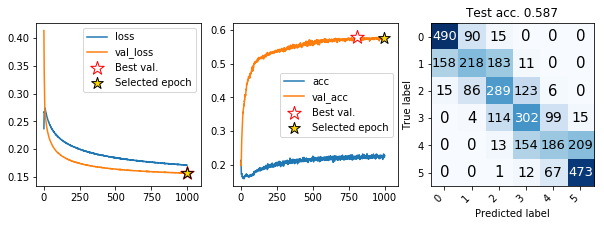

<Figure size 360x288 with 0 Axes>

In [6]:
def EM_log_loss(y_true, y_pred):
    y_pred = K.clip(y_pred, K.epsilon(), 1.0-K.epsilon())
    Q = y_true * y_pred
    Z_em_train = Q / K.sum(Q, axis=-1, keepdims=True)
    out = -K.stop_gradient(Z_em_train)*K.log(y_pred)
    return K.mean(out, axis=-1)

numpy.random.seed(0)
model = keras.models.Sequential() 
model.add(keras.layers.Dense(Y.shape[1], input_dim=X.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss=EM_log_loss, metrics=['acc'])

history = model.fit(X_train, V_train, 
                    validation_data=(X_val, Y_val),
                    epochs=max_epochs, verbose=1, callbacks=[early_stopping],
                    shuffle=True)
    
plot_history(history, model, X_test, y_test)

final_models['EM original M'] = model

# Our method with EM and estimated M

../wlc/WLweakener.py:496: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  S[weak_list, :] = alpha


Train on 3334 samples, validate on 3333 samples
Epoch 1/1000
3334/3334 [==============================] - 0s 92us/step - loss: 0.2373 - acc: 0.1965 - val_loss: 0.4160 - val_acc: 0.2037
Epoch 2/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2548 - acc: 0.2010 - val_loss: 0.3805 - val_acc: 0.2142
Epoch 3/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2671 - acc: 0.1977 - val_loss: 0.3512 - val_acc: 0.2088
Epoch 4/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.2694 - acc: 0.1986 - val_loss: 0.3297 - val_acc: 0.2205
Epoch 5/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2702 - acc: 0.2019 - val_loss: 0.3142 - val_acc: 0.2259
Epoch 6/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2713 - acc: 0.2097 - val_loss: 0.2970 - val_acc: 0.2466
Epoch 7/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.2751 - acc: 0.2169 - val_loss: 0.2816 - val_acc: 

3334/3334 [==============================] - 0s 49us/step - loss: 0.2405 - acc: 0.2472 - val_loss: 0.2076 - val_acc: 0.4575
Epoch 61/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.2395 - acc: 0.2445 - val_loss: 0.2072 - val_acc: 0.4593
Epoch 62/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2395 - acc: 0.2463 - val_loss: 0.2066 - val_acc: 0.4593
Epoch 63/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.2392 - acc: 0.2475 - val_loss: 0.2060 - val_acc: 0.4662
Epoch 64/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2390 - acc: 0.2454 - val_loss: 0.2058 - val_acc: 0.4719
Epoch 65/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.2391 - acc: 0.2546 - val_loss: 0.2053 - val_acc: 0.4590
Epoch 66/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2378 - acc: 0.2493 - val_loss: 0.2050 - val_acc: 0.4620
Epoch 67/1000
3334/3334 [=======================

3334/3334 [==============================] - 0s 50us/step - loss: 0.2227 - acc: 0.2484 - val_loss: 0.1905 - val_acc: 0.5083
Epoch 120/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.2224 - acc: 0.2469 - val_loss: 0.1902 - val_acc: 0.5071
Epoch 121/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2221 - acc: 0.2451 - val_loss: 0.1899 - val_acc: 0.5107
Epoch 122/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.2222 - acc: 0.2472 - val_loss: 0.1897 - val_acc: 0.5134
Epoch 123/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2219 - acc: 0.2460 - val_loss: 0.1895 - val_acc: 0.5131
Epoch 124/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2213 - acc: 0.2466 - val_loss: 0.1894 - val_acc: 0.5113
Epoch 125/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.2213 - acc: 0.2487 - val_loss: 0.1892 - val_acc: 0.5116
Epoch 126/1000
3334/3334 [================

3334/3334 [==============================] - 0s 49us/step - loss: 0.2125 - acc: 0.2448 - val_loss: 0.1819 - val_acc: 0.5245
Epoch 179/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2127 - acc: 0.2451 - val_loss: 0.1817 - val_acc: 0.5263
Epoch 180/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2126 - acc: 0.2466 - val_loss: 0.1814 - val_acc: 0.5311
Epoch 181/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.2129 - acc: 0.2451 - val_loss: 0.1815 - val_acc: 0.5260
Epoch 182/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2120 - acc: 0.2472 - val_loss: 0.1812 - val_acc: 0.5287
Epoch 183/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2127 - acc: 0.2478 - val_loss: 0.1812 - val_acc: 0.5281
Epoch 184/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.2125 - acc: 0.2522 - val_loss: 0.1814 - val_acc: 0.5230
Epoch 185/1000
3334/3334 [================

3334/3334 [==============================] - 0s 52us/step - loss: 0.2063 - acc: 0.2484 - val_loss: 0.1763 - val_acc: 0.5461
Epoch 238/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2060 - acc: 0.2484 - val_loss: 0.1764 - val_acc: 0.5410
Epoch 239/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2060 - acc: 0.2519 - val_loss: 0.1762 - val_acc: 0.5398
Epoch 240/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2053 - acc: 0.2466 - val_loss: 0.1762 - val_acc: 0.5347
Epoch 241/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2055 - acc: 0.2466 - val_loss: 0.1760 - val_acc: 0.5458
Epoch 242/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2061 - acc: 0.2570 - val_loss: 0.1761 - val_acc: 0.5377
Epoch 243/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2055 - acc: 0.2463 - val_loss: 0.1761 - val_acc: 0.5335
Epoch 244/1000
3334/3334 [================

3334/3334 [==============================] - 0s 52us/step - loss: 0.2009 - acc: 0.2472 - val_loss: 0.1723 - val_acc: 0.5569
Epoch 297/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2011 - acc: 0.2561 - val_loss: 0.1725 - val_acc: 0.5386
Epoch 298/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2005 - acc: 0.2460 - val_loss: 0.1725 - val_acc: 0.5458
Epoch 299/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2007 - acc: 0.2549 - val_loss: 0.1724 - val_acc: 0.5476
Epoch 300/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2004 - acc: 0.2493 - val_loss: 0.1721 - val_acc: 0.5512
Epoch 301/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.2003 - acc: 0.2552 - val_loss: 0.1720 - val_acc: 0.5542
Epoch 302/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2004 - acc: 0.2481 - val_loss: 0.1723 - val_acc: 0.5398
Epoch 303/1000
3334/3334 [================

3334/3334 [==============================] - 0s 53us/step - loss: 0.1965 - acc: 0.2504 - val_loss: 0.1697 - val_acc: 0.5488
Epoch 356/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1967 - acc: 0.2537 - val_loss: 0.1697 - val_acc: 0.5554
Epoch 357/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.1959 - acc: 0.2513 - val_loss: 0.1694 - val_acc: 0.5617
Epoch 358/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1966 - acc: 0.2588 - val_loss: 0.1696 - val_acc: 0.5551
Epoch 359/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1963 - acc: 0.2543 - val_loss: 0.1695 - val_acc: 0.5590
Epoch 360/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1962 - acc: 0.2588 - val_loss: 0.1695 - val_acc: 0.5566
Epoch 361/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1959 - acc: 0.2555 - val_loss: 0.1695 - val_acc: 0.5527
Epoch 362/1000
3334/3334 [================

3334/3334 [==============================] - 0s 51us/step - loss: 0.1938 - acc: 0.2624 - val_loss: 0.1674 - val_acc: 0.5644
Epoch 415/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1936 - acc: 0.2597 - val_loss: 0.1672 - val_acc: 0.5665
Epoch 416/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1931 - acc: 0.2618 - val_loss: 0.1674 - val_acc: 0.5629
Epoch 417/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1934 - acc: 0.2531 - val_loss: 0.1673 - val_acc: 0.5605
Epoch 418/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1930 - acc: 0.2585 - val_loss: 0.1674 - val_acc: 0.5611
Epoch 419/1000
3334/3334 [==============================] - 0s 50us/step - loss: 0.1932 - acc: 0.2549 - val_loss: 0.1673 - val_acc: 0.5635
Epoch 420/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1930 - acc: 0.2570 - val_loss: 0.1673 - val_acc: 0.5599
Epoch 421/1000
3334/3334 [================

3334/3334 [==============================] - 0s 50us/step - loss: 0.1907 - acc: 0.2573 - val_loss: 0.1653 - val_acc: 0.5698
Epoch 474/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1903 - acc: 0.2618 - val_loss: 0.1655 - val_acc: 0.5644
Epoch 475/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1904 - acc: 0.2552 - val_loss: 0.1654 - val_acc: 0.5662
Epoch 476/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1904 - acc: 0.2570 - val_loss: 0.1653 - val_acc: 0.5668
Epoch 477/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1902 - acc: 0.2609 - val_loss: 0.1654 - val_acc: 0.5671
Epoch 478/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1898 - acc: 0.2585 - val_loss: 0.1652 - val_acc: 0.5680
Epoch 479/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1902 - acc: 0.2576 - val_loss: 0.1651 - val_acc: 0.5728
Epoch 480/1000
3334/3334 [================

3334/3334 [==============================] - 0s 55us/step - loss: 0.1878 - acc: 0.2582 - val_loss: 0.1640 - val_acc: 0.5620
Epoch 533/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1881 - acc: 0.2579 - val_loss: 0.1642 - val_acc: 0.5650
Epoch 534/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1876 - acc: 0.2597 - val_loss: 0.1640 - val_acc: 0.5665
Epoch 535/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1882 - acc: 0.2582 - val_loss: 0.1643 - val_acc: 0.5632
Epoch 536/1000
3334/3334 [==============================] - 0s 44us/step - loss: 0.1875 - acc: 0.2582 - val_loss: 0.1638 - val_acc: 0.5704
Epoch 537/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1878 - acc: 0.2573 - val_loss: 0.1638 - val_acc: 0.5740
Epoch 538/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1879 - acc: 0.2639 - val_loss: 0.1639 - val_acc: 0.5689
Epoch 539/1000
3334/3334 [================

3334/3334 [==============================] - 0s 53us/step - loss: 0.1859 - acc: 0.2630 - val_loss: 0.1629 - val_acc: 0.5668
Epoch 592/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1856 - acc: 0.2600 - val_loss: 0.1627 - val_acc: 0.5677
Epoch 593/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1859 - acc: 0.2615 - val_loss: 0.1628 - val_acc: 0.5674
Epoch 594/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1857 - acc: 0.2597 - val_loss: 0.1628 - val_acc: 0.5656
Epoch 595/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1857 - acc: 0.2540 - val_loss: 0.1627 - val_acc: 0.5671
Epoch 596/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1854 - acc: 0.2579 - val_loss: 0.1627 - val_acc: 0.5668
Epoch 597/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1857 - acc: 0.2624 - val_loss: 0.1626 - val_acc: 0.5701
Epoch 598/1000
3334/3334 [================

3334/3334 [==============================] - 0s 51us/step - loss: 0.1839 - acc: 0.2597 - val_loss: 0.1617 - val_acc: 0.5701
Epoch 651/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1842 - acc: 0.2627 - val_loss: 0.1617 - val_acc: 0.5680
Epoch 652/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1835 - acc: 0.2513 - val_loss: 0.1618 - val_acc: 0.5659
Epoch 653/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.1838 - acc: 0.2576 - val_loss: 0.1617 - val_acc: 0.5689
Epoch 654/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1841 - acc: 0.2606 - val_loss: 0.1617 - val_acc: 0.5665
Epoch 655/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.1834 - acc: 0.2540 - val_loss: 0.1616 - val_acc: 0.5680
Epoch 656/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1838 - acc: 0.2627 - val_loss: 0.1615 - val_acc: 0.5713
Epoch 657/1000
3334/3334 [================

3334/3334 [==============================] - 0s 51us/step - loss: 0.1821 - acc: 0.2591 - val_loss: 0.1607 - val_acc: 0.5719
Epoch 710/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1822 - acc: 0.2534 - val_loss: 0.1607 - val_acc: 0.5701
Epoch 711/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1822 - acc: 0.2585 - val_loss: 0.1607 - val_acc: 0.5695
Epoch 712/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1821 - acc: 0.2600 - val_loss: 0.1606 - val_acc: 0.5704
Epoch 713/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1821 - acc: 0.2591 - val_loss: 0.1607 - val_acc: 0.5734
Epoch 714/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.1822 - acc: 0.2585 - val_loss: 0.1607 - val_acc: 0.5716
Epoch 715/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1819 - acc: 0.2531 - val_loss: 0.1605 - val_acc: 0.5719
Epoch 716/1000
3334/3334 [================

3334/3334 [==============================] - 0s 52us/step - loss: 0.1809 - acc: 0.2567 - val_loss: 0.1601 - val_acc: 0.5692
Epoch 769/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1806 - acc: 0.2597 - val_loss: 0.1599 - val_acc: 0.5701
Epoch 770/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1802 - acc: 0.2570 - val_loss: 0.1599 - val_acc: 0.5728
Epoch 771/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1810 - acc: 0.2591 - val_loss: 0.1598 - val_acc: 0.5737
Epoch 772/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1807 - acc: 0.2609 - val_loss: 0.1598 - val_acc: 0.5722
Epoch 773/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1808 - acc: 0.2627 - val_loss: 0.1600 - val_acc: 0.5713
Epoch 774/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1806 - acc: 0.2576 - val_loss: 0.1601 - val_acc: 0.5671
Epoch 775/1000
3334/3334 [================

3334/3334 [==============================] - 0s 54us/step - loss: 0.1791 - acc: 0.2585 - val_loss: 0.1593 - val_acc: 0.5722
Epoch 828/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1797 - acc: 0.2579 - val_loss: 0.1591 - val_acc: 0.5737
Epoch 829/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1795 - acc: 0.2600 - val_loss: 0.1592 - val_acc: 0.5707
Epoch 830/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1789 - acc: 0.2570 - val_loss: 0.1592 - val_acc: 0.5704
Epoch 831/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1794 - acc: 0.2579 - val_loss: 0.1591 - val_acc: 0.5719
Epoch 832/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1792 - acc: 0.2576 - val_loss: 0.1591 - val_acc: 0.5728
Epoch 833/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1792 - acc: 0.2603 - val_loss: 0.1591 - val_acc: 0.5707
Epoch 834/1000
3334/3334 [================

3334/3334 [==============================] - 0s 50us/step - loss: 0.1781 - acc: 0.2615 - val_loss: 0.1586 - val_acc: 0.5704
Epoch 887/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1778 - acc: 0.2567 - val_loss: 0.1586 - val_acc: 0.5692
Epoch 888/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1781 - acc: 0.2612 - val_loss: 0.1585 - val_acc: 0.5749
Epoch 889/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1776 - acc: 0.2588 - val_loss: 0.1584 - val_acc: 0.5731
Epoch 890/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1780 - acc: 0.2618 - val_loss: 0.1584 - val_acc: 0.5731
Epoch 891/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1778 - acc: 0.2573 - val_loss: 0.1585 - val_acc: 0.5719
Epoch 892/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1780 - acc: 0.2609 - val_loss: 0.1583 - val_acc: 0.5749
Epoch 893/1000
3334/3334 [================

3334/3334 [==============================] - 0s 50us/step - loss: 0.1768 - acc: 0.2609 - val_loss: 0.1580 - val_acc: 0.5728
Epoch 946/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1768 - acc: 0.2612 - val_loss: 0.1579 - val_acc: 0.5761
Epoch 947/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1769 - acc: 0.2594 - val_loss: 0.1580 - val_acc: 0.5716
Epoch 948/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.1767 - acc: 0.2600 - val_loss: 0.1578 - val_acc: 0.5734
Epoch 949/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.1768 - acc: 0.2609 - val_loss: 0.1578 - val_acc: 0.5740
Epoch 950/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.1769 - acc: 0.2597 - val_loss: 0.1581 - val_acc: 0.5704
Epoch 951/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.1766 - acc: 0.2597 - val_loss: 0.1577 - val_acc: 0.5776
Epoch 952/1000
3334/3334 [================

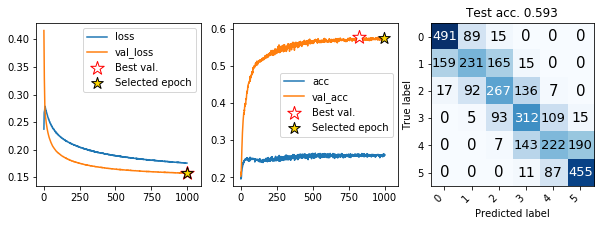

<Figure size 360x288 with 0 Axes>

In [7]:
numpy.random.seed(0)
model = keras.models.Sequential() 
model.add(keras.layers.Dense(Y.shape[1], input_dim=X.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss=EM_log_loss, metrics=['acc'])

from wlc.WLweakener import estimate_M

M_estimated = estimate_M(Z_val, Y_val, range(n_classes), reg='Partial', Z_reg=Z_train)
M_indices = weak_to_index(Z_train, method='random_weak')
V_train = M_estimated[M_indices]

history = model.fit(X_train, V_train, 
                    validation_data=(X_val, Y_val),
                    epochs=max_epochs, verbose=1, callbacks=[early_stopping],
                    shuffle=True)
    
plot_history(history, model, X_test, y_test)

final_models['EM estimated M'] = model

# Fully weak (lowerbound)

Train on 3334 samples, validate on 3333 samples
Epoch 1/1000
3334/3334 [==============================] - 0s 100us/step - loss: 5.7623 - acc: 0.0744 - val_loss: 2.2665 - val_acc: 0.1875
Epoch 2/1000
3334/3334 [==============================] - 0s 46us/step - loss: 5.0100 - acc: 0.0750 - val_loss: 1.9976 - val_acc: 0.1809
Epoch 3/1000
3334/3334 [==============================] - 0s 46us/step - loss: 4.6334 - acc: 0.0735 - val_loss: 1.8652 - val_acc: 0.2031
Epoch 4/1000
3334/3334 [==============================] - 0s 44us/step - loss: 4.4234 - acc: 0.0753 - val_loss: 1.7880 - val_acc: 0.2097
Epoch 5/1000
3334/3334 [==============================] - 0s 48us/step - loss: 4.3170 - acc: 0.0777 - val_loss: 1.7509 - val_acc: 0.2133
Epoch 6/1000
3334/3334 [==============================] - 0s 46us/step - loss: 4.2760 - acc: 0.0774 - val_loss: 1.7329 - val_acc: 0.2253
Epoch 7/1000
3334/3334 [==============================] - 0s 47us/step - loss: 4.2571 - acc: 0.0798 - val_loss: 1.7230 - val_acc:

3334/3334 [==============================] - 0s 49us/step - loss: 4.1742 - acc: 0.2735 - val_loss: 1.6426 - val_acc: 0.3954
Epoch 61/1000
3334/3334 [==============================] - 0s 46us/step - loss: 4.1741 - acc: 0.2780 - val_loss: 1.6460 - val_acc: 0.3927
Epoch 62/1000
3334/3334 [==============================] - 0s 46us/step - loss: 4.1746 - acc: 0.2738 - val_loss: 1.6416 - val_acc: 0.3729
Epoch 63/1000
3334/3334 [==============================] - 0s 48us/step - loss: 4.1746 - acc: 0.2777 - val_loss: 1.6465 - val_acc: 0.3972
Epoch 64/1000
3334/3334 [==============================] - 0s 46us/step - loss: 4.1742 - acc: 0.2780 - val_loss: 1.6434 - val_acc: 0.3909
Epoch 65/1000
3334/3334 [==============================] - 0s 48us/step - loss: 4.1740 - acc: 0.2825 - val_loss: 1.6443 - val_acc: 0.3387
Epoch 66/1000
3334/3334 [==============================] - 0s 46us/step - loss: 4.1743 - acc: 0.2825 - val_loss: 1.6474 - val_acc: 0.3837
Epoch 67/1000
3334/3334 [=======================

3334/3334 [==============================] - 0s 53us/step - loss: 4.1740 - acc: 0.2720 - val_loss: 1.6460 - val_acc: 0.3717
Epoch 120/1000
3334/3334 [==============================] - 0s 47us/step - loss: 4.1745 - acc: 0.2789 - val_loss: 1.6387 - val_acc: 0.3558
Epoch 121/1000
3334/3334 [==============================] - 0s 47us/step - loss: 4.1742 - acc: 0.2771 - val_loss: 1.6454 - val_acc: 0.3840
Epoch 122/1000
3334/3334 [==============================] - 0s 46us/step - loss: 4.1742 - acc: 0.2810 - val_loss: 1.6470 - val_acc: 0.3831
Epoch 123/1000
3334/3334 [==============================] - 0s 45us/step - loss: 4.1743 - acc: 0.2783 - val_loss: 1.6427 - val_acc: 0.3711
Epoch 124/1000
3334/3334 [==============================] - 0s 45us/step - loss: 4.1742 - acc: 0.2777 - val_loss: 1.6458 - val_acc: 0.3942
Epoch 125/1000
3334/3334 [==============================] - 0s 48us/step - loss: 4.1742 - acc: 0.2768 - val_loss: 1.6446 - val_acc: 0.4098
Epoch 126/1000
3334/3334 [================

3334/3334 [==============================] - 0s 54us/step - loss: 4.1743 - acc: 0.2831 - val_loss: 1.6426 - val_acc: 0.3903
Epoch 179/1000
3334/3334 [==============================] - 0s 45us/step - loss: 4.1742 - acc: 0.2726 - val_loss: 1.6469 - val_acc: 0.3942
Epoch 180/1000
3334/3334 [==============================] - 0s 45us/step - loss: 4.1743 - acc: 0.2747 - val_loss: 1.6442 - val_acc: 0.3903
Epoch 181/1000
3334/3334 [==============================] - 0s 46us/step - loss: 4.1744 - acc: 0.2777 - val_loss: 1.6444 - val_acc: 0.3747
Epoch 182/1000
3334/3334 [==============================] - 0s 46us/step - loss: 4.1736 - acc: 0.2726 - val_loss: 1.6459 - val_acc: 0.3870
Epoch 183/1000
3334/3334 [==============================] - 0s 45us/step - loss: 4.1743 - acc: 0.2816 - val_loss: 1.6478 - val_acc: 0.3789
Epoch 184/1000
3334/3334 [==============================] - 0s 46us/step - loss: 4.1740 - acc: 0.2795 - val_loss: 1.6440 - val_acc: 0.3852
Epoch 185/1000
3334/3334 [================

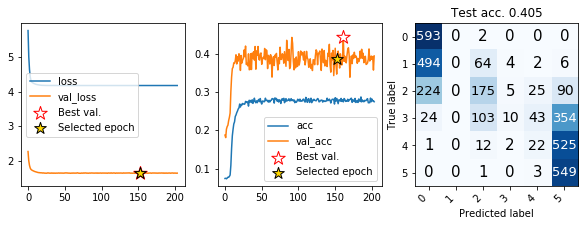

<Figure size 360x288 with 0 Axes>

In [8]:
numpy.random.seed(0)
model = keras.models.Sequential() 
model.add(keras.layers.Dense(Y.shape[1], input_dim=X.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, Z_train, 
                    validation_data=(X_val, Y_val),
                    epochs=max_epochs, verbose=1, callbacks=[early_stopping],
                    shuffle=True)
    
plot_history(history, model, X_test, y_test)

final_models['Fully weak'] = model

Train on 3334 samples, validate on 3333 samples
Epoch 1/1000
3334/3334 [==============================] - 0s 119us/step - loss: 0.2883 - acc: 0.0738 - val_loss: 0.4027 - val_acc: 0.1848
Epoch 2/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.2766 - acc: 0.0720 - val_loss: 0.3666 - val_acc: 0.1731
Epoch 3/1000
3334/3334 [==============================] - 0s 49us/step - loss: 0.2699 - acc: 0.0630 - val_loss: 0.3423 - val_acc: 0.1638
Epoch 4/1000
3334/3334 [==============================] - 0s 49us/step - loss: 0.2623 - acc: 0.0561 - val_loss: 0.3254 - val_acc: 0.1719
Epoch 5/1000
3334/3334 [==============================] - 0s 49us/step - loss: 0.2581 - acc: 0.0549 - val_loss: 0.3176 - val_acc: 0.1758
Epoch 6/1000
3334/3334 [==============================] - 0s 52us/step - loss: 0.2560 - acc: 0.0561 - val_loss: 0.3120 - val_acc: 0.1761
Epoch 7/1000
3334/3334 [==============================] - 0s 49us/step - loss: 0.2549 - acc: 0.0597 - val_loss: 0.3086 - val_acc:

3334/3334 [==============================] - 0s 50us/step - loss: 0.2289 - acc: 0.2678 - val_loss: 0.2502 - val_acc: 0.4548
Epoch 61/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2287 - acc: 0.2672 - val_loss: 0.2503 - val_acc: 0.4563
Epoch 62/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2286 - acc: 0.2663 - val_loss: 0.2495 - val_acc: 0.4548
Epoch 63/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.2285 - acc: 0.2669 - val_loss: 0.2485 - val_acc: 0.4566
Epoch 64/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.2283 - acc: 0.2663 - val_loss: 0.2480 - val_acc: 0.4548
Epoch 65/1000
3334/3334 [==============================] - 0s 49us/step - loss: 0.2282 - acc: 0.2678 - val_loss: 0.2478 - val_acc: 0.4548
Epoch 66/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2281 - acc: 0.2654 - val_loss: 0.2470 - val_acc: 0.4551
Epoch 67/1000
3334/3334 [=======================

3334/3334 [==============================] - 0s 70us/step - loss: 0.2249 - acc: 0.2708 - val_loss: 0.2284 - val_acc: 0.4569
Epoch 120/1000
3334/3334 [==============================] - 0s 52us/step - loss: 0.2250 - acc: 0.2708 - val_loss: 0.2277 - val_acc: 0.4569
Epoch 121/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2249 - acc: 0.2732 - val_loss: 0.2275 - val_acc: 0.4575
Epoch 122/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2249 - acc: 0.2735 - val_loss: 0.2274 - val_acc: 0.4581
Epoch 123/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.2249 - acc: 0.2723 - val_loss: 0.2276 - val_acc: 0.4578
Epoch 124/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.2249 - acc: 0.2708 - val_loss: 0.2275 - val_acc: 0.4581
Epoch 125/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.2248 - acc: 0.2717 - val_loss: 0.2268 - val_acc: 0.4581
Epoch 126/1000
3334/3334 [================

3334/3334 [==============================] - 0s 51us/step - loss: 0.2242 - acc: 0.2729 - val_loss: 0.2214 - val_acc: 0.4572
Epoch 179/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.2242 - acc: 0.2726 - val_loss: 0.2221 - val_acc: 0.4569
Epoch 180/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2242 - acc: 0.2732 - val_loss: 0.2219 - val_acc: 0.4566
Epoch 181/1000
3334/3334 [==============================] - 0s 45us/step - loss: 0.2242 - acc: 0.2741 - val_loss: 0.2217 - val_acc: 0.4569
Epoch 182/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.2242 - acc: 0.2714 - val_loss: 0.2216 - val_acc: 0.4566
Epoch 183/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.2242 - acc: 0.2729 - val_loss: 0.2214 - val_acc: 0.4560
Epoch 184/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.2242 - acc: 0.2720 - val_loss: 0.2216 - val_acc: 0.4566
Epoch 185/1000
3334/3334 [================

3334/3334 [==============================] - 0s 51us/step - loss: 0.2238 - acc: 0.2777 - val_loss: 0.2211 - val_acc: 0.4563
Epoch 238/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.2239 - acc: 0.2765 - val_loss: 0.2214 - val_acc: 0.4563
Epoch 239/1000
3334/3334 [==============================] - 0s 50us/step - loss: 0.2238 - acc: 0.2777 - val_loss: 0.2216 - val_acc: 0.4563
Epoch 240/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.2238 - acc: 0.2753 - val_loss: 0.2215 - val_acc: 0.4572
Epoch 241/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.2238 - acc: 0.2753 - val_loss: 0.2209 - val_acc: 0.4575
Epoch 242/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.2238 - acc: 0.2756 - val_loss: 0.2211 - val_acc: 0.4575
Epoch 243/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.2238 - acc: 0.2750 - val_loss: 0.2210 - val_acc: 0.4584
Epoch 244/1000
3334/3334 [================

3334/3334 [==============================] - 0s 48us/step - loss: 0.2237 - acc: 0.2732 - val_loss: 0.2205 - val_acc: 0.4566
Epoch 297/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.2237 - acc: 0.2765 - val_loss: 0.2215 - val_acc: 0.4566
Epoch 298/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.2237 - acc: 0.2741 - val_loss: 0.2224 - val_acc: 0.4569
Epoch 299/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.2237 - acc: 0.2750 - val_loss: 0.2220 - val_acc: 0.4563
Epoch 300/1000
3334/3334 [==============================] - 0s 46us/step - loss: 0.2237 - acc: 0.2762 - val_loss: 0.2204 - val_acc: 0.4599
Epoch 301/1000
3334/3334 [==============================] - 0s 48us/step - loss: 0.2237 - acc: 0.2714 - val_loss: 0.2195 - val_acc: 0.4584
Epoch 302/1000
3334/3334 [==============================] - 0s 47us/step - loss: 0.2236 - acc: 0.2723 - val_loss: 0.2211 - val_acc: 0.4560
Epoch 303/1000
3334/3334 [================

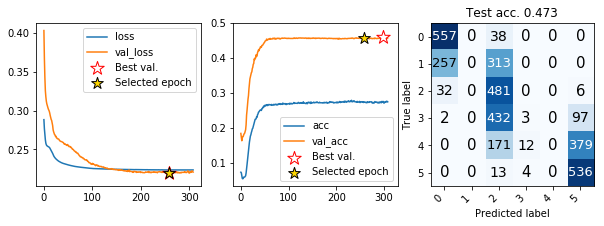

<Figure size 360x288 with 0 Axes>

In [9]:
def OSL_log_loss(y_true, y_pred):
    # Careful, I had to use a global variable here for the number of classes
    # for some reason I can not use y_osl.shape[-1] in the reshape function
    y_pred = K.clip(y_pred, K.epsilon(), 1.0-K.epsilon())
    y_osl = y_true * y_pred
    y_osl_max = K.max(y_osl, axis=-1)
    y_osl_max = K.repeat_elements(y_osl_max, n_classes, 0)
    y_osl_max = K.reshape(y_osl_max, (-1, n_classes))
    y_osl = K.cast(K.equal(y_osl, y_osl_max), y_pred.dtype)
    y_osl = y_osl / K.sum(y_osl, axis=-1, keepdims=True)
    out = -K.stop_gradient(y_osl) * K.log(y_pred)
    return K.mean(out, axis=-1)

numpy.random.seed(0)
model = keras.models.Sequential() 
model.add(keras.layers.Dense(Y.shape[1], input_dim=X.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss=OSL_log_loss, metrics=['acc'])

history = model.fit(X_train, Z_train, 
                    validation_data=(X_val, Y_val),
                    epochs=max_epochs, verbose=1, callbacks=[early_stopping],
                    shuffle=True)
    
plot_history(history, model, X_test, y_test)

final_models['OSL'] = model

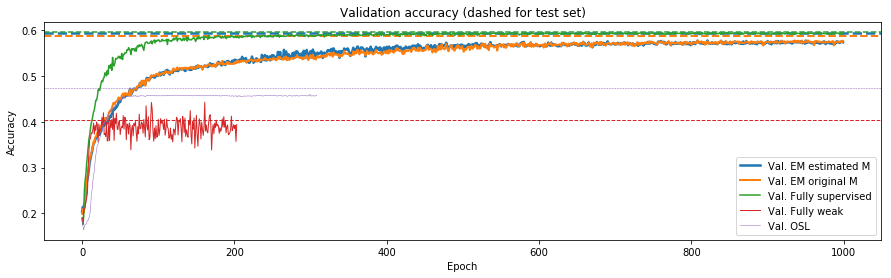

In [16]:
plt.figure(figsize=(15, 4))
for i, (key, model) in enumerate(sorted(final_models.items())):
    lw = (len(final_models) - i)/2
    p = plt.plot(model.history.history['val_acc'], lw=lw, label='Val. ' + key)
    test_acc = numpy.mean(model.predict_classes(X_test) == y_test)
    plt.axhline(y=test_acc, color=p[0].get_color(), lw=lw, linestyle='--')
plt.title('Validation accuracy (dashed for test set)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()